# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

# Attribute Information:

- age : age of primary beneficiary
- sex : insurance contractor gender, female, male
- bmi : Body mass index, providing an understanding of body,
- weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of
- height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance /
- Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance.

## Import all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
#import statsmodels.api as sm

## Read the data into the notebook

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [4]:
df.shape

(1338, 7)

# Check for missing value

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking the summary of dataframe

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


# Plot the Histograms

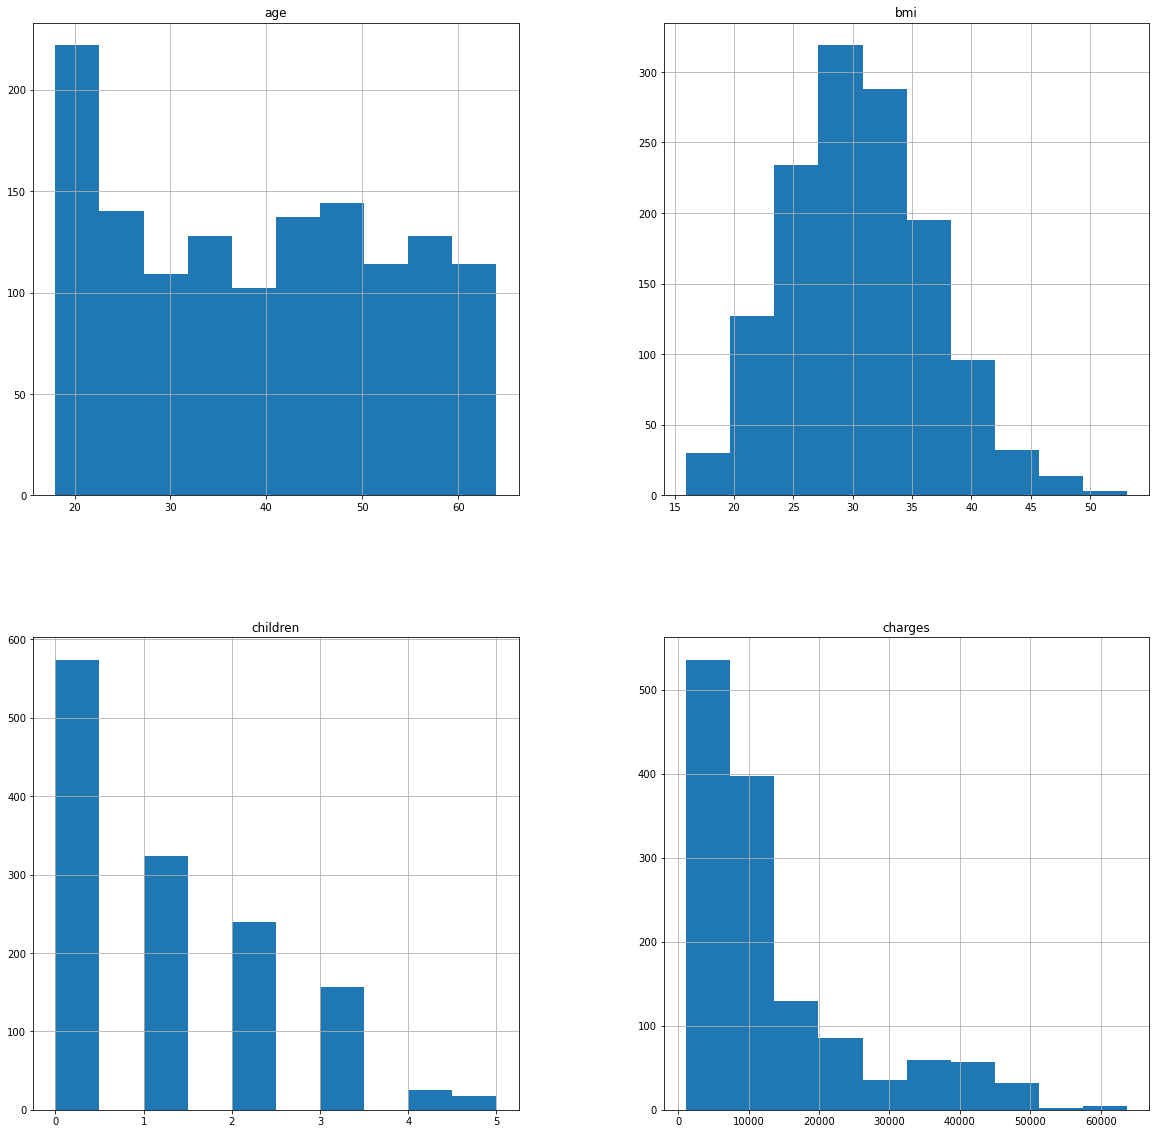

In [7]:
df.hist(figsize=(20,20))
plt.show()

In [8]:
skewness = pd.DataFrame({'Skewness':[stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                       index=['bmi','age','charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


# Check Outliers

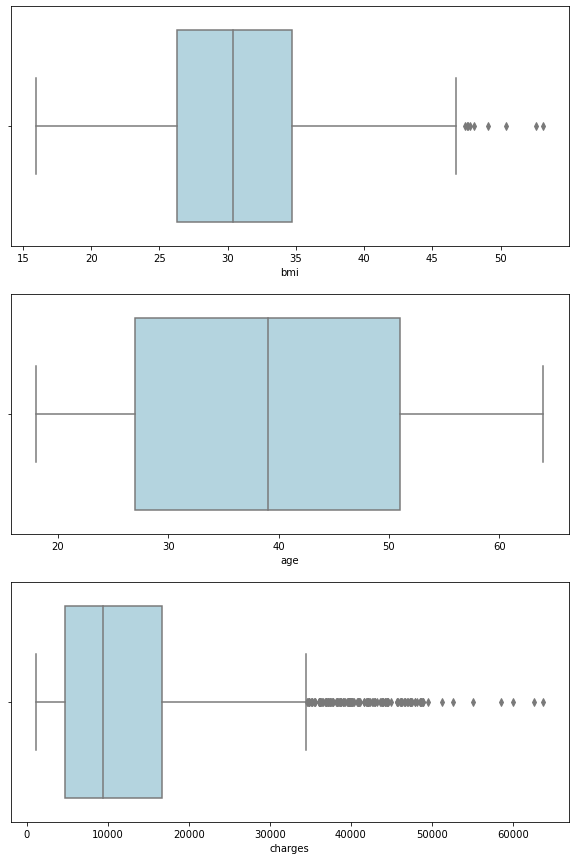

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.boxplot(x = df['bmi'],color='lightblue')
plt.subplot(3,1,2)
sns.boxplot(x= df['age'],color = 'lightblue')
plt.subplot(3,1,3)
sns.boxplot(x = df['charges'],color = 'lightblue')
plt.show()

# Plot Count Plot

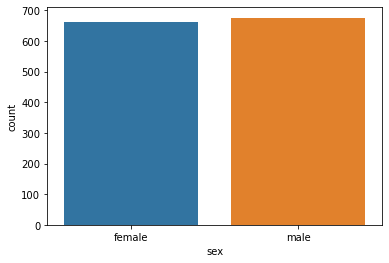

In [17]:
sns.countplot(x = df['sex'])
plt.show()

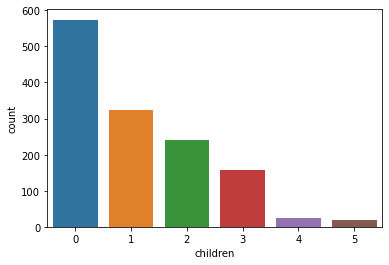

In [19]:
sns.countplot(x = df['children'])
plt.show()

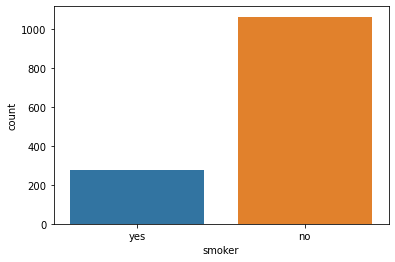

In [21]:
sns.countplot(x = df['smoker'])
plt.show()

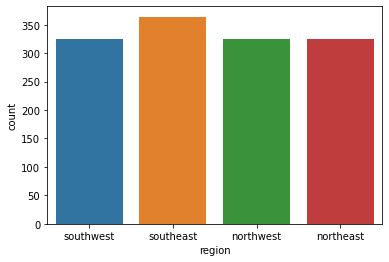

In [22]:
sns.countplot(x = df['region'])
plt.show()

### Bi-variate distribution of every possible attribute pair

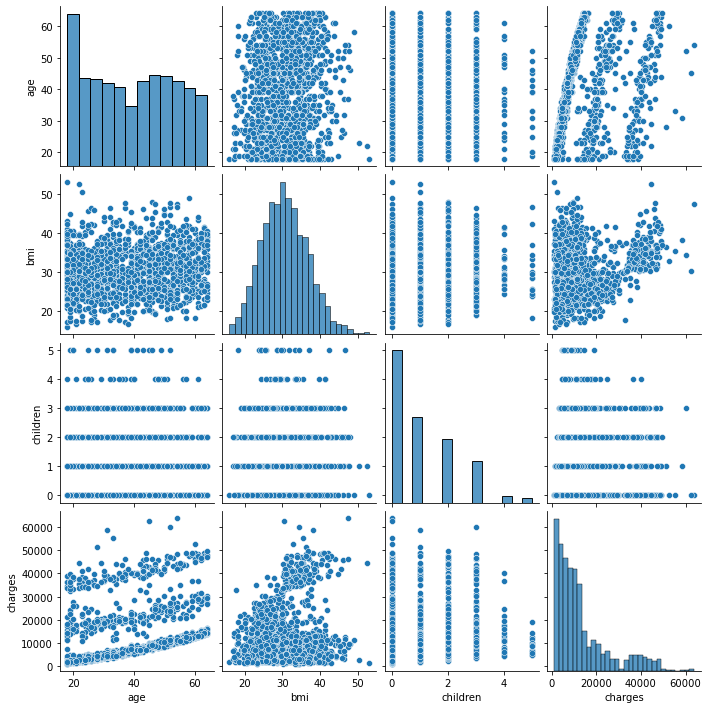

In [23]:
sns.pairplot(df)
plt.show()

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

In [25]:
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

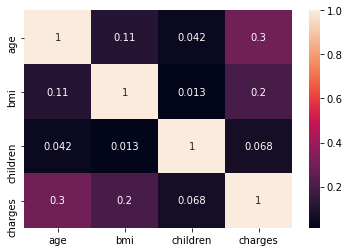

In [26]:
sns.heatmap(corr,annot = True)

## Do charges of people who smoke differ significantly from the people who don't?

In [30]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='age', ylabel='charges'>

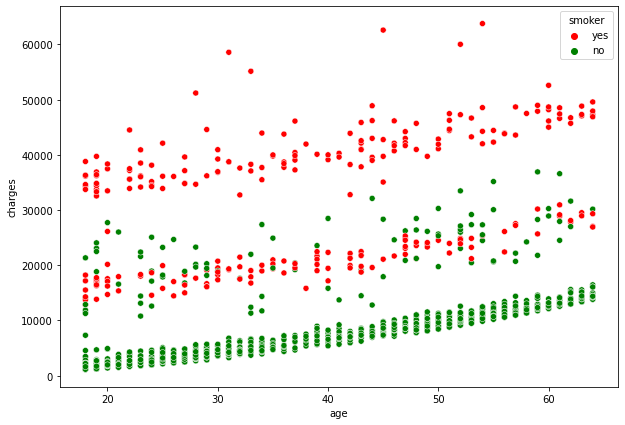

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df['age'],y = df['charges'],hue = df['smoker'],palette=['red','green'])

## Does bmi of males differ significantly from that of females?

In [32]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

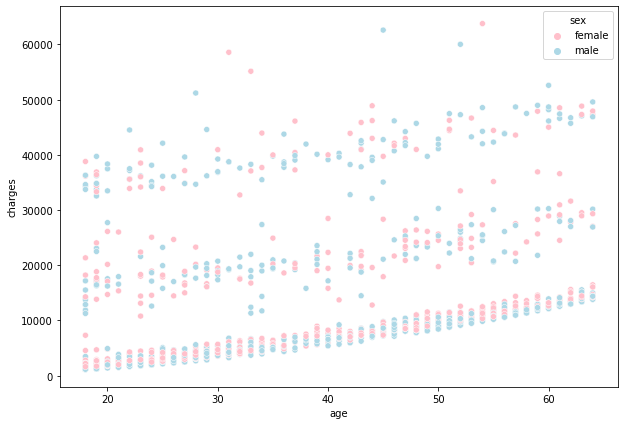

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df['age'],y = df['charges'],hue = df['sex'],palette=['pink','lightblue'])
plt.show()